In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:
agent_data = pd.read_csv('agent_performance.csv')


In [12]:
agent_data

,Company name,Start date,Nationality,Current living state,Purchased Gallon,Discounts,Revenue,Fleet size,Lead source,Current status,Cards used,Cards ordered,LOC status
0,Mommoth transportation LLC,01/12/2024,Iran,California,24300,7500,78000,4.0,Web sourcing,Active,4,4,Approved
1,Star logistics company LLC,01/04/2025,South America,Tennessee,4600,2070,13700,10.0,CRM,Active,6,10,Approved
2,Arnold Auto Carriers LLC,01/04/2025,USA,Mississippi,8700,4500,26000,3.0,CRM,Active,3,3,Approved
3,DMZ Hauling LLC,01/04/2025,USA,Alabama,300,20,850,2.0,Facebook,Active,1,2,Approved
4,Levan Express Trucking,01/12/2024,Georgia,Pennsylvania,3600,1210,11830,1.0,CRM,Active,1,1,Approved
5,Otay transportation,01/03/2025,South America,California,900,0,4200,4.0,CRM,Active,1,4,Approved
6,Drr Express LLC,01/05/2025,Uzbekistan,Texas,0,0,0,0.0,Referral,Enrolled,0,2,Approved
7,Komol Express LLC,01/05/2025,Uzbekistan,Texas,0,0,0,0.0,Referral,Enrolled,0,2,Approved
8,One Wing Transportation,01/02/2025,USA,Georgia,0,0,0,2.0,CRM,Enrolled,0,2,Not approved
9,Rollas Progress Report,01/05/2025,USA,Mississippi,0,0,0,5.0,Facebook,Enrolled,0,2,Approved


In [7]:
agent_data.columns

Index(['Company name', 'Start date', 'Nationality ', 'Current living state',
       'Purchased Gallon', 'Discounts', 'Revenue', 'Fleet size', 'Lead source',
       'Current status', 'Cards used', 'Cards ordered', 'LOC status'],
      dtype='object')

In [8]:
agent_data.dtypes

Company name             object
Start date               object
Nationality              object
Current living state     object
Purchased Gallon          int64
Discounts                 int64
Revenue                   int64
Fleet size              float64
Lead source              object
Current status           object
Cards used                int64
Cards ordered             int64
LOC status               object
dtype: object

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_5140/4053712429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


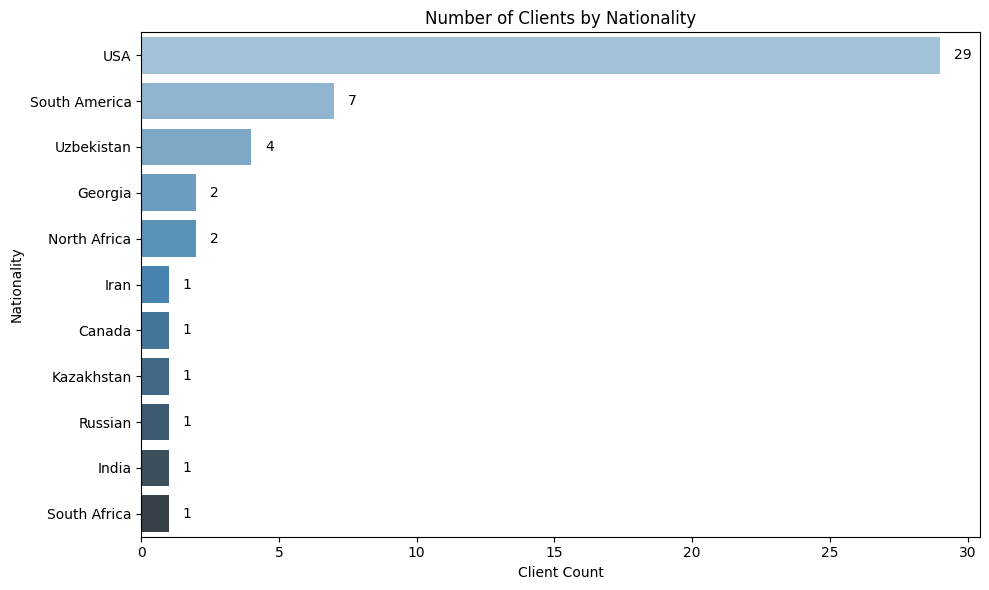

In [18]:
nationality_counts = agent_data['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Client Count']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=nationality_counts,
    x='Client Count',
    y='Nationality',
    palette='Blues_d'
)

# Add value labels
for i, row in nationality_counts.iterrows():
    ax.text(
        row['Client Count'] + 0.5,  # small offset to right of bar
        i,                          # y position
        str(row['Client Count']),   # label text
        va='center'
    )

plt.title('Number of Clients by Nationality')
plt.xlabel('Client Count')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

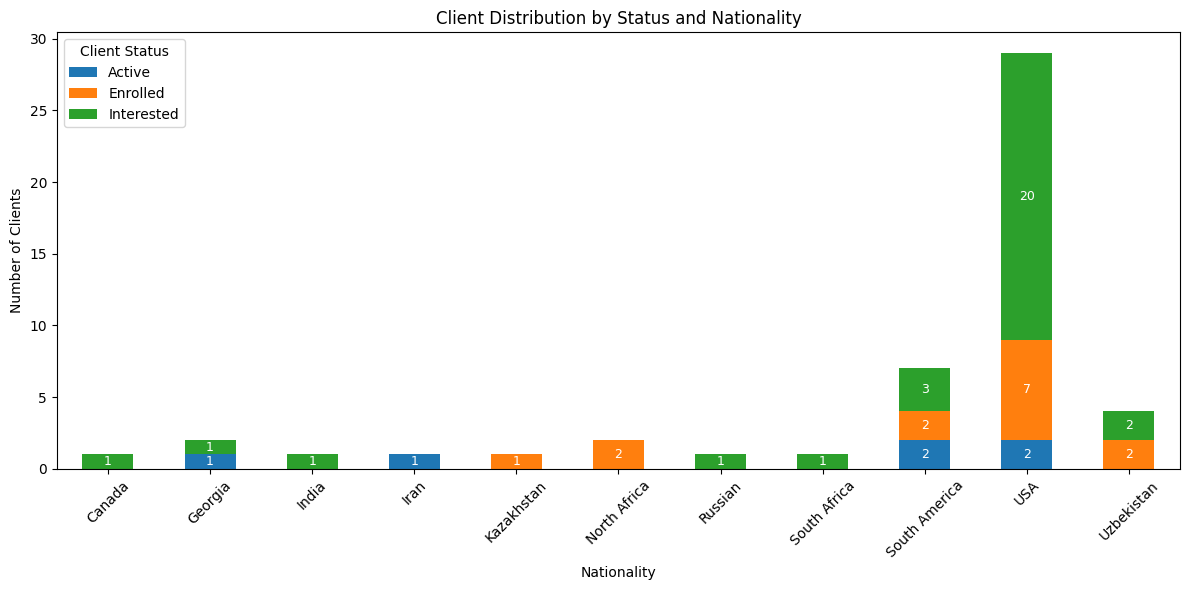

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the data
pivot_data = agent_data.pivot_table(
    index='Nationality',
    columns='Current status',
    values='Company name',
    aggfunc='count',
    fill_value=0
)

# Define custom color mapping
custom_colors = {
    'Active': '#1f77b4',      # blue
    'Enrolled': '#ff7f0e',    # orange
    'Interested': '#2ca02c'   # green
}

# Ensure order matches the column order
colors = [custom_colors[status] for status in pivot_data.columns]

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Add count labels to each segment
for idx, nationality in enumerate(pivot_data.index):
    y_offset = 0
    for status in pivot_data.columns:
        count = pivot_data.loc[nationality, status]
        if count > 0:
            ax.text(
                idx,
                y_offset + count / 2,
                str(count),
                ha='center', va='center',
                fontsize=9, color='white'
            )
            y_offset += count

# Final touches
plt.title('Client Distribution by Status and Nationality')
plt.ylabel('Number of Clients')
plt.xlabel('Nationality')
plt.xticks(rotation=45)
plt.legend(title='Client Status')
plt.tight_layout()
plt.show()

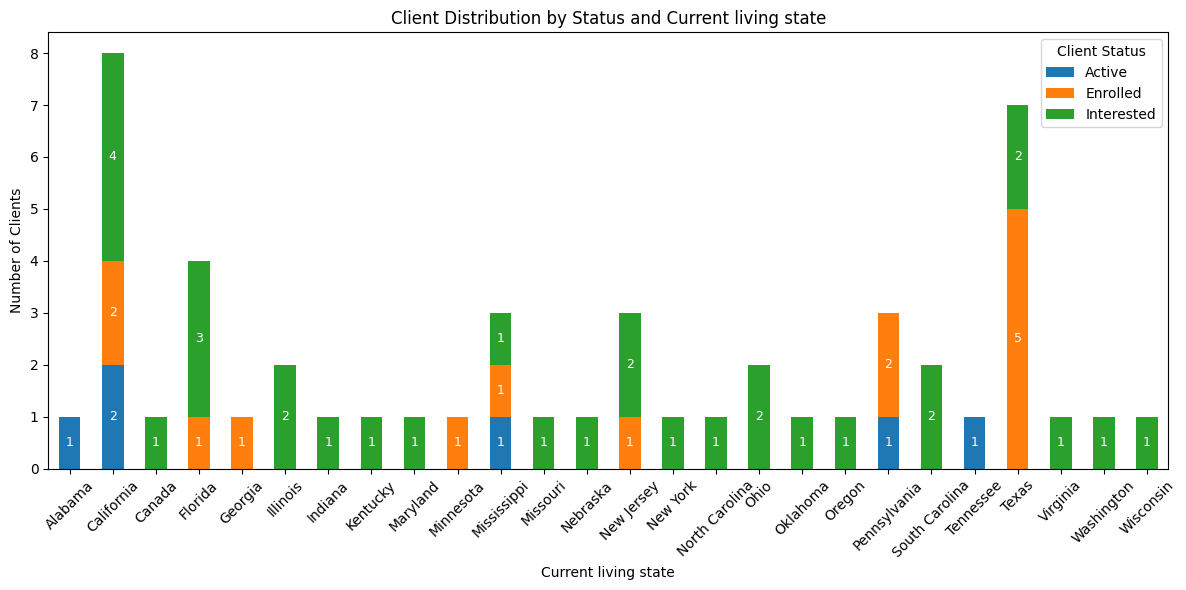

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the data
pivot_data = agent_data.pivot_table(
    index='Current living state',
    columns='Current status',
    values='Company name',
    aggfunc='count',
    fill_value=0
)

# Define custom color mapping
custom_colors = {
    'Active': '#1f77b4',      # blue
    'Enrolled': '#ff7f0e',    # orange
    'Interested': '#2ca02c'   # green
}

# Ensure order matches the column order
colors = [custom_colors[status] for status in pivot_data.columns]

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Add count labels to each segment
for idx, nationality in enumerate(pivot_data.index):
    y_offset = 0
    for status in pivot_data.columns:
        count = pivot_data.loc[nationality, status]
        if count > 0:
            ax.text(
                idx,
                y_offset + count / 2,
                str(count),
                ha='center', va='center',
                fontsize=9, color='white'
            )
            y_offset += count

# Final touches
plt.title('Client Distribution by Status and Current living state')
plt.ylabel('Number of Clients')
plt.xlabel('Current living state')
plt.xticks(rotation=45)
plt.legend(title='Client Status')
plt.tight_layout()
plt.show()

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_5140/1005705173.py:17: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



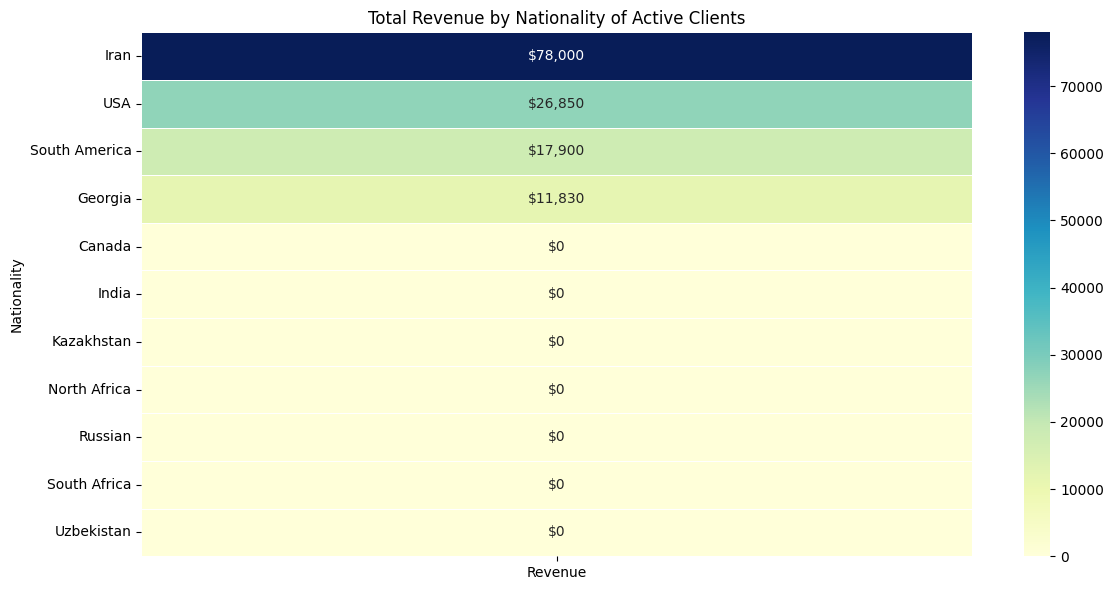

In [63]:
# Pivot the data
revenue_pivot = agent_data.pivot_table(
    index='Nationality',
    values='Revenue',
    aggfunc='sum',
    fill_value=0
)

# Sort the data in descending order by revenue
revenue_pivot = revenue_pivot.sort_values(by='Revenue', ascending=False)

# Set custom color range
vmin = revenue_pivot.values.min()
vmax = revenue_pivot.values.max()

# Format values as strings with dollar signs for annotation
formatted_annot = revenue_pivot.applymap(lambda x: f"${int(x):,}")

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(revenue_pivot, annot=formatted_annot, fmt='', cmap='YlGnBu',
            linewidths=0.5, vmin=vmin, vmax=vmax)

# Titles and labels
plt.title('Total Revenue by Nationality of Active Clients')
plt.xlabel('')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_5140/3662655094.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




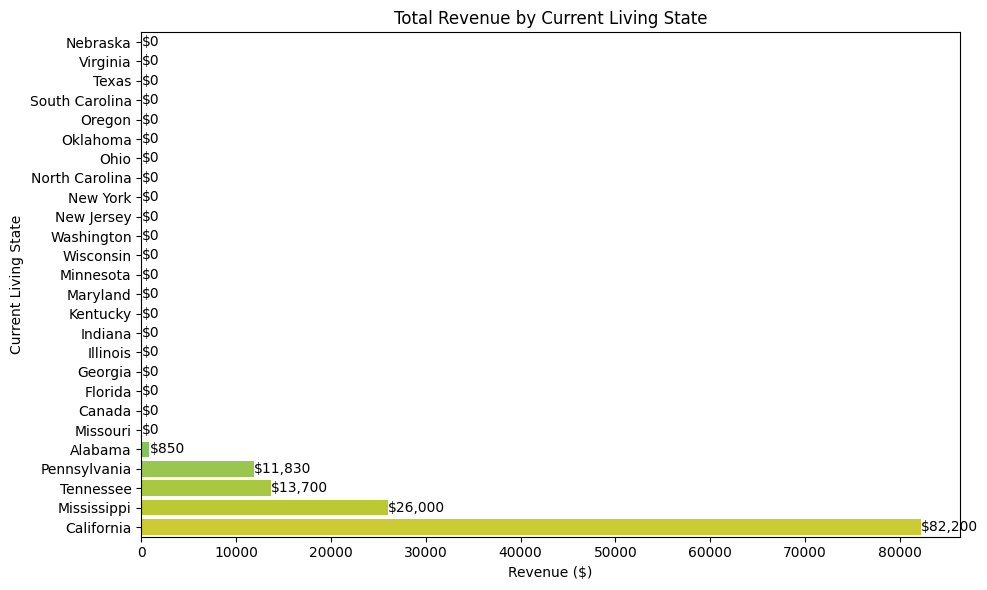

In [58]:
# Aggregate the data by Current Living State and sum of Revenue
living_state_revenue = agent_data.groupby('Current living state')['Revenue'].sum().reset_index()

# Sort data by Revenue in descending order
living_state_revenue = living_state_revenue.sort_values(by='Revenue', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=living_state_revenue, x='Revenue', y='Current living state', palette='viridis')

# Add labels to each bar
for index, value in enumerate(living_state_revenue['Revenue']):
    plt.text(value, index, f'${value:,.0f}', color='black', ha="left", va="center", fontsize=10)

# Title and labels
plt.title('Total Revenue by Current Living State')
plt.xlabel('Revenue ($)')
plt.ylabel('Current Living State')
plt.tight_layout()
plt.show()

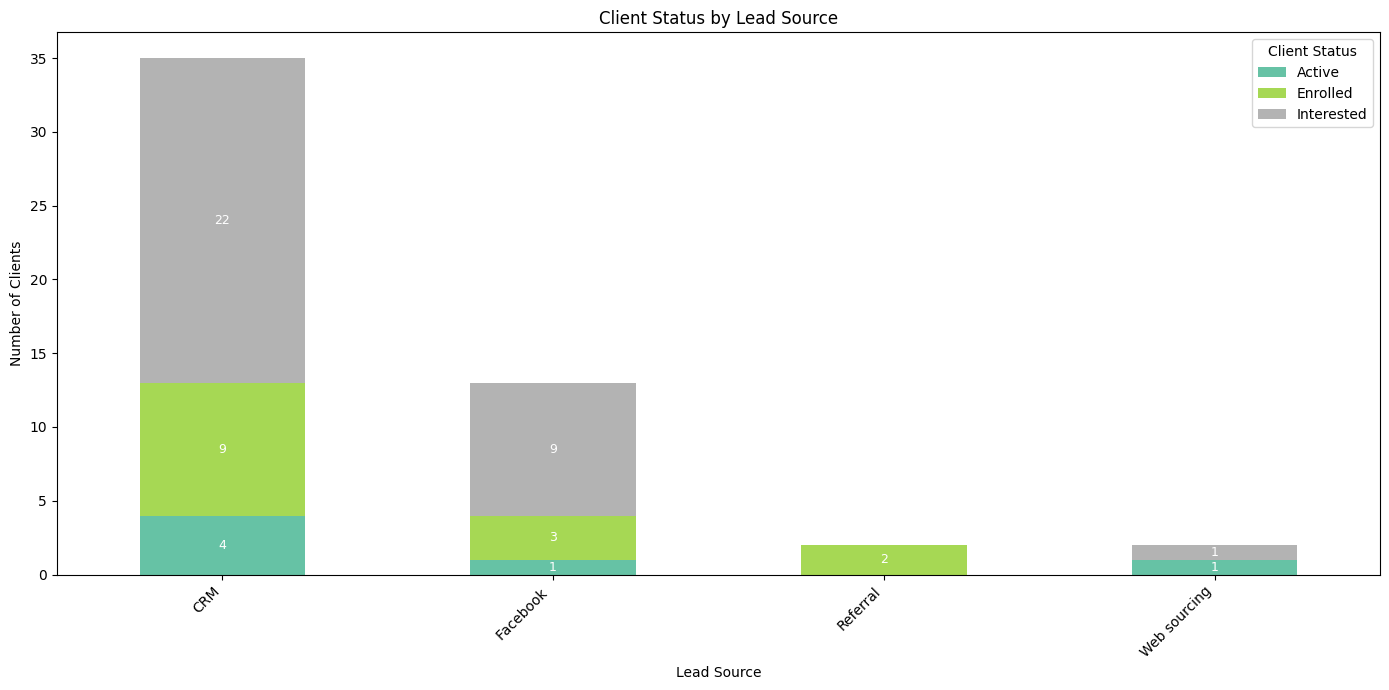

In [46]:
lead_source_pivot = agent_data.pivot_table(
    index='Lead source',
    columns='Current status',
    values='Company name',
    aggfunc='count',
    fill_value=0
)

# Plot a stacked bar chart
ax = lead_source_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

# Add count labels to each segment of the bars
for idx, lead_source in enumerate(lead_source_pivot.index):
    y_offset = 0
    for status in lead_source_pivot.columns:
        count = lead_source_pivot.loc[lead_source, status]
        if count > 0:
            ax.text(
                idx,                    # x position (bar index)
                y_offset + count / 2,   # y position (center of the bar segment)
                str(count),             # label
                ha='center', va='center', fontsize=9, color='white'
            )
            y_offset += count  # move up for next segment

# Final touches
plt.title('Client Status by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Client Status')
plt.tight_layout()
plt.show()

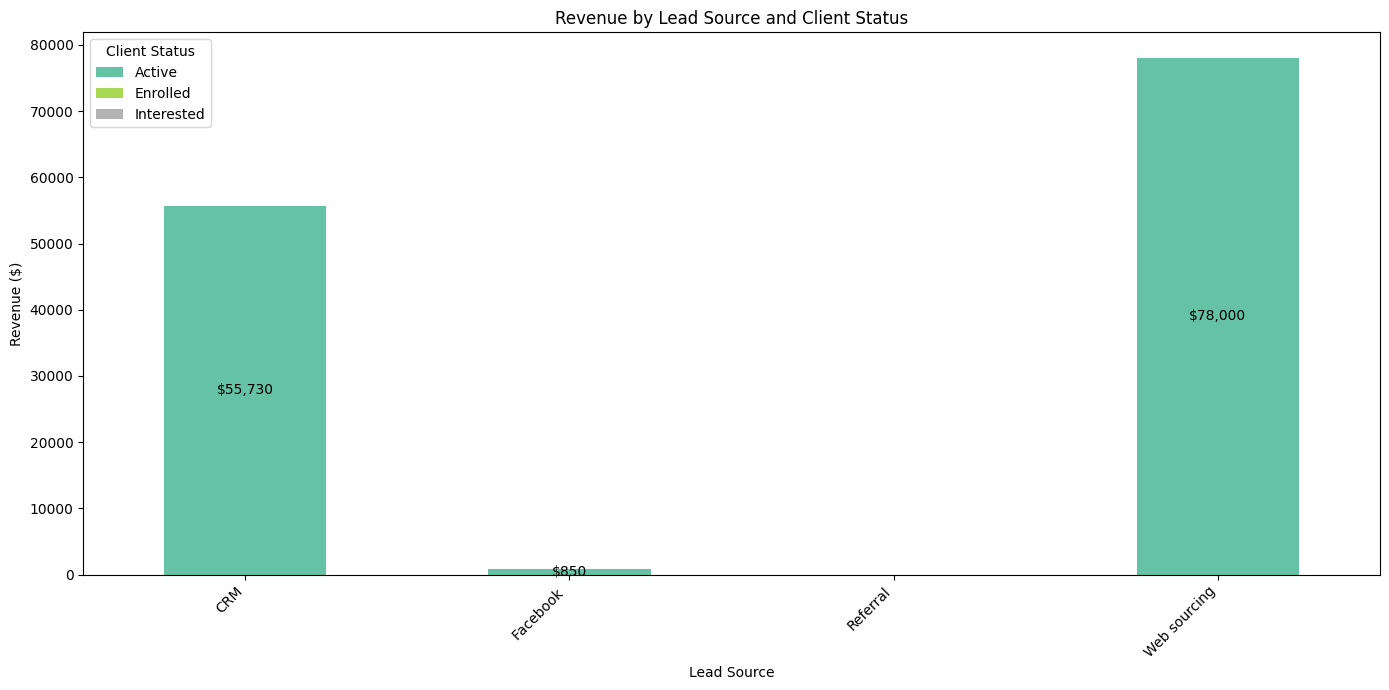

In [48]:
lead_source_revenue_pivot = agent_data.pivot_table(
    index='Lead source',
    columns='Current status',
    values='Revenue',
    aggfunc='sum',
    fill_value=0
)

# Plot a stacked bar chart
ax = lead_source_revenue_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

# Add count labels to each segment of the bars
for idx, lead_source in enumerate(lead_source_revenue_pivot.index):
    y_offset = 0
    for status in lead_source_revenue_pivot.columns:
        revenue = lead_source_revenue_pivot.loc[lead_source, status]
        
        # If the segment is very small, position the text above the bar
        if revenue > 0:
            text_position = y_offset + revenue / 2
            # If the segment is small, adjust text placement above the bar
            if text_position < 0.05 * lead_source_revenue_pivot.sum(axis=1).max():
                text_position += 0.1  # Slightly move the text above
                
            ax.text(
                idx,                    # x position (bar index)
                text_position,          # y position (center of the bar segment)
                f'${revenue:,.0f}',      # label, formatted as currency
                ha='center', va='center', fontsize=10, color='black'  # Adjust fontsize and color
            )
            y_offset += revenue  # move up for next segment

# Final touches
plt.title('Revenue by Lead Source and Client Status')
plt.xlabel('Lead Source')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Client Status')
plt.tight_layout()
plt.show()

/var/folders/wd/rpkzwtfs7wsgdcggmt203sdw0000gn/T/ipykernel_5140/1947665.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




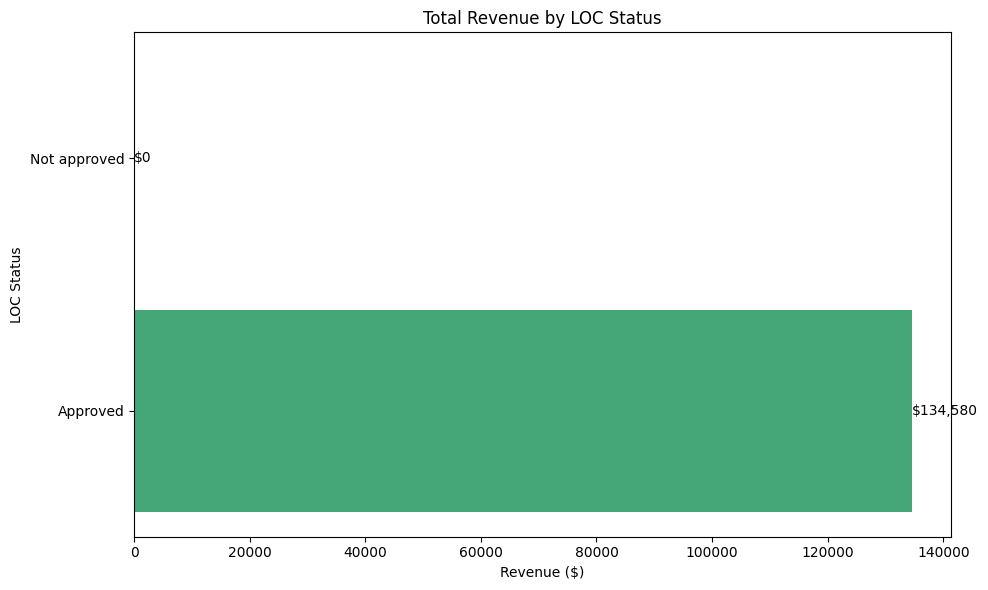

In [60]:
loc_status_revenue = agent_data.groupby('LOC status')['Revenue'].sum().reset_index()

# Sort data by Revenue in descending order
loc_status_revenue = loc_status_revenue.sort_values(by='Revenue', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=loc_status_revenue, x='Revenue', y='LOC status', palette='viridis')

# Add labels to each bar
for index, value in enumerate(loc_status_revenue['Revenue']):
    plt.text(value, index, f'${value:,.0f}', color='black', ha="left", va="center", fontsize=10)

# Title and labels
plt.title('Total Revenue by LOC Status')
plt.xlabel('Revenue ($)')
plt.ylabel('LOC Status')
plt.tight_layout()
plt.show()